# STARDIS

## Import Necessary Code

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from tardis.io.atom_data.util import download_atom_data

from stardis.base import run_stardis

from astropy import units as u, constants as const

## Download Atomic Data

In [22]:
download_atom_data('kurucz_cd23_chianti_H_He')

## The STARDIS Configuration

STARDIS uses [YAML](https://yaml.org/) files for the configuration. The configuration file called `stardis_example.yml` used here can be found
[here](https://github.com/tardis-sn/stardis/tree/main/docs/quickstart),
along with any other files from this Quickstart. Below, we present an
example for instructions for customizing the configuration for your
needs.

``` yaml
stardis_config_version: 1.0
atom_data: <filepath to atomic data file>
model:
    type: marcs # more options will be available in the future
    fname: <filepath to MARCS model file>
    final_atomic_number: <atomic number of largest element considered> # may be up to 30
opacity:
    file: # reads a bound-free or free-free opacity file, omit if none
        <species1>_<either bf for bound-free or ff for free-free>: <filepath to opacity file>
        <species2>_<either bf for bound-free or ff for free-free>: <filepath to opacity file>
        ...
    bf: # uses the hydrogenic approximation for bound-free opacity, omit if none
        <species1>: {} # there will eventually be options to include files with gaunt factors or departure coefficients
        <species2>: {}
        ...
    ff: # uses the hydrogenic approximation for free-free opacity, omit if none
        <species1>: {} # there will eventually be options to include files with gaunt factors or departure coefficients
        <species2>: {}
        ...
    rayleigh: <list of species considered for rayleigh scattering> # may include H, He, and/or H2, omit or use [] for none
    disable_electron_scattering: <True or False>
    line: # settings for line interaction opacity, at least one subfield is required
        disable: <True or False>
        broadening: <list of non-thermal broadening sources considered> # may include radiation, linear_stark, quadratic_stark, and/or van_der_waals, omit or use [] for none
        min: <minimum resonance frequency or wavelength of lines considered> # must have units, such as Hz or AA
        max: <maximum resonance frequency or wavelength of lines considered> # must have units, such as Hz or AA
        broadening_range: <maximum distance in frquency space to the resonant frequency for line broadening to be considered> # necessary for computational efficiency and must have units, 1e13 Hz recommended
no_of_thetas: <number of angles to sample for raytracing>
```

In fields where an atomic species is requested, the species must be in
the form `<atomic symbol>_<ionization roman numeral>`. For example,
`H_I` for neutral hydrogen, or `Si_III` for twice-ionized silicon.

Additionally, in the opacity file section, the following entries are
valid:

-   `Hminus_bf`
-   `Hminus_ff`
-   `Heminus_ff`
-   `H2minus_ff`
-   `H2plus_ff`

## Opacity File Format

STARDIS can read and interpolate continuum opacity cross-section files
for bound-free or free-free absorption (technically, for free-free
absorption the files would provide the cross-section per electron
density). The files must be one of the following formats:

``` csv
wavelength_1, cross-section_1
wavelength_2, cross-section_2
wavelength_3, cross-section_3
...
```

or

``` csv
, temperature_1, temperature_2, temperature_3, ...
wavelength_1, cross-section_11, cross-section_12, cross-section_13, ...
wavelength_2, cross-section_21, cross-section_22, cross-section_23, ...
wavelength_3, cross-section_31, cross-section_32, cross-section_33, ...
...
```

Note the leading comma in the latter format. Temperatures must be in
Kelvin, wavelengths in Angstroms, and cross-sections in cm^2^ for
bound-free or cm^5^ for free-free (once again because free-free opacity
files provide the cross-section per electron density).


## Create Array of Wavelengths and Run STARDIS

The main function, ``run_stardis()``, requires as its first argument the name of a configuration file, which will be described below. The second argument is an array of the frequencies or wavelengths for which you are requesting the flux density, times an appropriate astropy quantity (such as Hertz or Angstroms). Note that this must be an array times a quantity, **not** an array of astropy quantities.

In [23]:
tracing_lambdas = np.mgrid[6540:6590:.01]* u.Angstrom

sim = run_stardis('stardis_example.yml', tracing_lambdas)

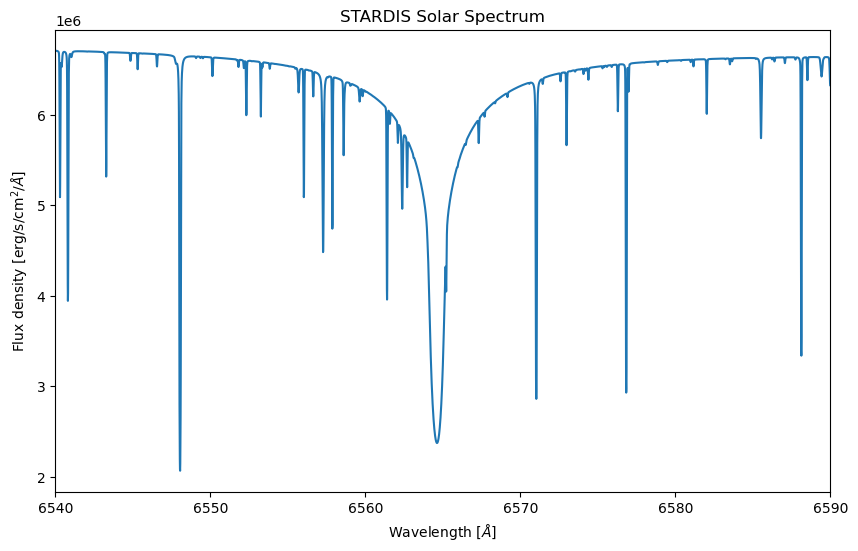

In [24]:
# Plot spectra

#%matplotlib notebook

plt.figure(figsize=(10,6))
plt.plot(sim.lambdas, sim.spectrum_lambda)

plt.xlim((6540,6590))
plt.title("STARDIS Solar Spectrum")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux density [erg/s/cm$^2$/$\AA$]")

plt.show()